# Testing `2024-11-17-rev1-000` Model

In [8]:
import sys
import os

from lib.tools import create_dir

colab = 'google.colab' in sys.modules

In [9]:
if colab:
    os.environ['PROJECT_DIR'] = project_dir = '/content/Foggy-CycleGAN'
    replace = True
    if os.path.isdir(project_dir):
        choice = input("Project already exists in folder " +
                       "{}\nDelete the files and pull again? Enter Y/(N):\n"
                       .format(project_dir))
        if choice.lower() == 'y':
            !rm -r $PROJECT_DIR
            print("Deleted folder {}".format(project_dir))
        else:
            replace = False
            print("Nothing was changed.")
    if replace:
        !cd /content && git clone https://github.com/ghaiszaher/Foggy-CycleGAN.git
        print("Project cloned to " + project_dir)
    os.chdir(project_dir)
    print("Done.")

In [13]:
output = './weights/generator_clear2fog.weights.h5'
if not os.path.exists(output):
    import gdown
    file_id = '10cBLNuofYGbyrC6DKRycD-fmx0Wh7BCr'
    create_dir('./weights/')
    print("Downloading weights...")
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
    print("Weights downloaded.")
else:
    print("Weights already downloaded.")

Weights already downloaded.


In [11]:
from lib.models import ModelsBuilder

models_builder = ModelsBuilder()
generator_clear2fog = models_builder.build_generator()
generator_clear2fog.load_weights('./weights/generator_clear2fog.weights.h5')

/Users/ghaiszaher/Library/Caches/pypoetry/virtualenvs/foggy-cyclegan-8iyj8dkp-py3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_184', 'keras_tensor_185']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Saved foggy image to ./custom-images/output/image.png


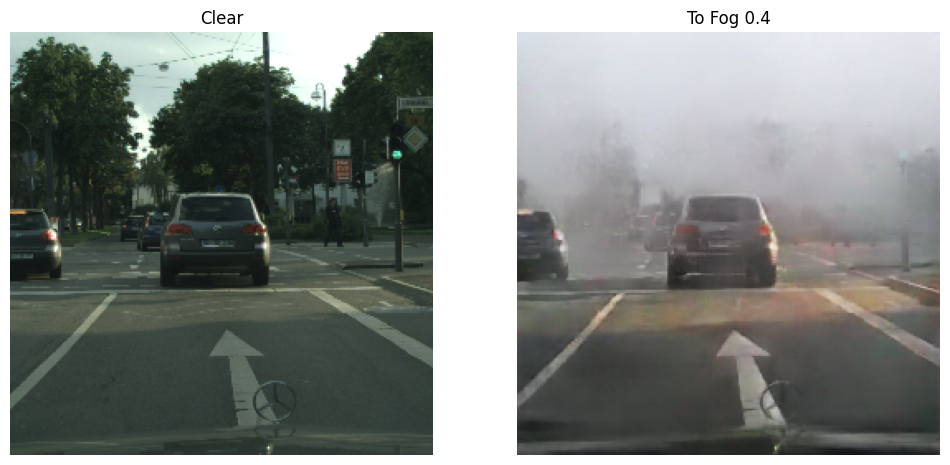

In [12]:
from lib.plot import plot_clear2fog_intensity
import tensorflow as tf
from lib.dataset import DatasetInitializer

datasetInit = DatasetInitializer(256, 256)

input_path = './custom-images/input/image.png'  #@param {type:"string"}
fog_intensity = 0.4  #@param {type:"slider", min:0.05, max:1.00, step:0.05}
output_path = './custom-images/output/image.png'  #@param {type:"string"}

image_clear = tf.io.decode_png(tf.io.read_file(input_path), channels=3)
image_clear, _ = datasetInit.preprocess_image_test(image_clear, 0)

fig, foggy_image = plot_clear2fog_intensity(generator_clear2fog, image_clear, fog_intensity)
foggy_image_uint8 = tf.image.convert_image_dtype(foggy_image, dtype=tf.uint8)
encoded_image = tf.io.encode_png(foggy_image_uint8)
tf.io.write_file(output_path, encoded_image)
print(f"Saved foggy image to {output_path}")